### Projeto: Análise da área de Dados


#### Contexto

- Fonte dos dados: https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-20242025
- Os dados são fornecem um panorma sobre o mercado de trabalho brasileiro na área de Dados.

### Objetivos da Análise

Entender quais são os fatores relacionados à remuneração dos profissionais que estão atuando como funcionários CLT.

#### Sobre os dados da Pesquisa
O questionário foi dividido em 8 partes, e dentro de cada uma das partes temos as perguntas e opções de escolha.

- Parte 1 - Dados demográficos
- Parte 2 - Dados sobre carreira
- Parte 3 - Desafios dos gestores de times de dados
- Parte 4 - Conhecimentos na área de dados
- Parte 5 - Objetivos na área de dados
- Parte 6 - Conhecimentos em Engenharia de Dados/DE
- Parte 7 - Conhecimentos em Análise de Dados/DA
- Parte 8 - Conhecimentos em Ciências de Dados/DS

Cada pergunta é dividida em Parte, Letra da Pergunta, Número da Opção escolhida
Exemplo: P3a_1 = Parte 3, pergunta (a), opção (1)

In [1]:
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='Set2', context='notebook')

from src.config import DADOS_ORIGINAIS
from src.graficos import composicao_histograma_boxplot

In [2]:
base = pd.read_csv(DADOS_ORIGINAIS)

base.head(5)

,0.a_token,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia",...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
0,reb94rv0msth7q4nreb94riaq80iz3yi,16/10/2024 11:19:17,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,16/10/2024 20:45:31,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,17/10/2024 18:10:59,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,22/10/2024 18:03:00,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,23/10/2024 01:33:23,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Columns: 403 entries, 0.a_token to 8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
dtypes: bool(1), float64(323), int64(1), object(78)
memory usage: 16.0+ MB


In [4]:
base.describe()

,1.a_idade,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia","1.e.3_Sim, devido a minha identidade de gênero","1.e.4_Sim, devido ao fato de ser PCD",1.f.1_Quantidade de oportunidades de emprego/vagas recebidas,1.f.2_Senioridade das vagas recebidas em relação à sua experiência,1.f.3_Aprovação em processos seletivos/entrevistas,1.f.4_Oportunidades de progressão de carreira,1.f.5_Velocidade de progressão de carreira,...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
count,5217.000000,2641.000000,2641.000000,2641.000000,2641.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,...,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,32.358827,0.511927,0.221128,0.319576,0.033321,0.392552,0.359969,0.373157,0.521334,0.556245,...,0.222510,0.298836,0.086675,0.091850,0.041397,0.003881,0.043984,0.009056,0.011643,0.133247
std,7.419433,0.499952,0.415085,0.466401,0.179507,0.488508,0.480177,0.483831,0.499739,0.497019,...,0.416201,0.458044,0.281541,0.289001,0.199336,0.062217,0.205193,0.094791,0.107342,0.340062
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
colunas_lista = base.columns.to_list()
colunas_lista

['0.a_token',
 '0.d_data/hora_envio',
 '1.a_idade',
 '1.a.1_faixa_idade',
 '1.b_genero',
 '1.c_cor/raca/etnia',
 '1.d_pcd',
 '1.e_experiencia_profissional_prejudicada',
 '1.e.1_Não acredito que minha experiência profissional seja afetada',
 '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
 '1.e.3_Sim, devido a minha identidade de gênero',
 '1.e.4_Sim, devido ao fato de ser PCD',
 '1.i.1_uf_onde_mora',
 '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho

Devido a grande quantidade de colunas (324) iremos selecionar alguma colunas hipotéticamente que podem afetar a faixa de salários para analisá-las.

In [6]:
coluna_alvo = []
colunas_analise = []
coluna_alvo = ['2.h_faixa_salarial']

colunas_analise = [
'1.a_idade',
'1.b_genero',
'1.i.1_uf_onde_mora',
 '1.g_vive_no_brasil',
'1.l_nivel_de_ensino',
 '1.m_área_de_formação',
 '2.a_situação_de_trabalho',
 '2.d_atua_como_gestor',
'2.f_cargo_atual',
'2.g_nivel',
'2.i_tempo_de_experiencia_em_dados',
 '2.j_tempo_de_experiencia_em_ti',
 '2.r_modelo_de_trabalho_atual',
'4.a_funcao_de_atuacao',
  '4.d.2_R', #'4.d_linguagem_de_programacao_(dia_a_dia)',
 '4.l_tipo_de_uso_de_ai_generativa_e_llm_na_empresa',
'4.m_usa_chatgpt_ou_copilot_no_trabalho?'
]

colunas = colunas_analise + coluna_alvo

In [7]:
base = base[colunas]


In [8]:
base.head(5)

,1.a_idade,1.b_genero,1.i.1_uf_onde_mora,1.g_vive_no_brasil,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.d_atua_como_gestor,2.f_cargo_atual,2.g_nivel,2.i_tempo_de_experiencia_em_dados,2.j_tempo_de_experiencia_em_ti,2.r_modelo_de_trabalho_atual,4.a_funcao_de_atuacao,4.d.2_R,4.l_tipo_de_uso_de_ai_generativa_e_llm_na_empresa,4.m_usa_chatgpt_ou_copilot_no_trabalho?,2.h_faixa_salarial
0,18,Masculino,RS,True,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,False,Analista de Dados/Data Analyst,Júnior,de 1 a 2 anos,de 1 a 2 anos,Modelo 100% remoto,*Análise de Dados/BI:* Extrai e cruza dados un...,0.0,Colaboradores utilizando soluções baseadas em ...,Utilizo apenas soluções gratuitas (como por ex...,de R$ 1.001/mês a R$ 2.000/mês
1,18,Masculino,SC,True,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,False,Analista de BI/BI Analyst,Júnior,Menos de 1 ano,Menos de 1 ano,Modelo 100% presencial,*Análise de Dados/BI:* Extrai e cruza dados un...,0.0,Colaboradores utilizando soluções baseadas em ...,Utilizo apenas soluções gratuitas (como por ex...,Menos de R$ 1.000/mês
2,18,Masculino,SP,True,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),False,Outra Opção,Júnior,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,Modelo 100% presencial,"Atuo na área de dados, mas não atuo em nenhuma...",0.0,Colaboradores utilizando soluções baseadas em ...,Utilizo apenas soluções gratuitas (como por ex...,de R$ 1.001/mês a R$ 2.000/mês
3,18,Masculino,SP,True,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,False,Analista de Dados/Data Analyst,Júnior,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,Modelo híbrido flexível (o funcionário tem lib...,*Análise de Dados/BI:* Extrai e cruza dados un...,0.0,Não sei opinar.,Utilizo apenas soluções gratuitas (como por ex...,de R$ 1.001/mês a R$ 2.000/mês
4,18,Masculino,SP,True,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,False,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,Menos de 1 ano,Menos de 1 ano,Modelo 100% remoto,NaN,0.0,Colaboradores utilizando soluções baseadas em ...,Utilizo apenas soluções gratuitas (como por ex...,de R$ 1.001/mês a R$ 2.000/mês


Renomear Colunas

In [9]:
colunas_renomeadas = [
    'idade',
    'genero',
    'uf_onde_mora',
    'vive_no_brasil',
    'nivel_de_ensino',
    'área_de_formação',
    'situação_de_trabalho',
    'atua_como_gestor',
    'cargo_atual',
    'nivel_cargo',
    'tempo_de_experiencia_em_dados',
    'tempo_de_experiencia_em_ti',
    'modelo_de_trabalho_atual',
    'funcao_de_atuacao',
    'linguagem_R_no_trabalho',
    'tipo_de_uso_de_ai_generativa_e_llm_na_empresa',
    'usa_chatgpt_ou_copilot_no_trabalho?',
    'faixa_salarial'
]

In [10]:
base.columns = colunas_renomeadas

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   idade                                          5217 non-null   int64  
 1   genero                                         5217 non-null   object 
 2   uf_onde_mora                                   5075 non-null   object 
 3   vive_no_brasil                                 5217 non-null   bool   
 4   nivel_de_ensino                                5217 non-null   object 
 5   área_de_formação                               5123 non-null   object 
 6   situação_de_trabalho                           5217 non-null   object 
 7   atua_como_gestor                               4863 non-null   object 
 8   cargo_atual                                    3818 non-null   object 
 9   nivel_cargo                                    3818 

In [12]:
base.isnull().sum()

idade                                               0
genero                                              0
uf_onde_mora                                      142
vive_no_brasil                                      0
nivel_de_ensino                                     0
área_de_formação                                   94
situação_de_trabalho                                0
atua_como_gestor                                  354
cargo_atual                                      1399
nivel_cargo                                      1399
tempo_de_experiencia_em_dados                     354
tempo_de_experiencia_em_ti                        354
modelo_de_trabalho_atual                          354
funcao_de_atuacao                                1418
linguagem_R_no_trabalho                          1628
tipo_de_uso_de_ai_generativa_e_llm_na_empresa    1598
usa_chatgpt_ou_copilot_no_trabalho?              1598
faixa_salarial                                    354
dtype: int64

In [13]:
pd.crosstab(index=base['situação_de_trabalho'], columns=base['faixa_salarial'], values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=False, normalize=False)

faixa_salarial,Acima de R$ 40.001/mês,Menos de R$ 1.000/mês,de R$ 1.001/mês a R$ 2.000/mês,de R$ 12.001/mês a R$ 16.000/mês,de R$ 16.001/mês a R$ 20.000/mês,de R$ 2.001/mês a R$ 3.000/mês,de R$ 20.001/mês a R$ 25.000/mês,de R$ 25.001/mês a R$ 30.000/mês,de R$ 3.001/mês a R$ 4.000/mês,de R$ 30.001/mês a R$ 40.000/mês,de R$ 4.001/mês a R$ 6.000/mês,de R$ 6.001/mês a R$ 8.000/mês,de R$ 8.001/mês a R$ 12.000/mês,NaN
situação_de_trabalho,,,,,,,,,,,,,,
Desempregado e não estou buscando recolocação,0,0,0,4,2,0,0,0,1,1,1,0,2,0
"Desempregado, buscando recolocação",0,0,0,0,0,0,0,0,0,0,0,0,0,205
Empreendedor ou Empregado (CNPJ),18,2,7,73,56,15,35,26,34,18,62,59,89,0
Empregado (CLT),51,2,43,599,354,155,168,100,211,85,506,567,942,0
Estagiário,1,21,96,1,0,52,0,0,12,0,1,2,0,0
Freelancer,1,4,4,3,3,4,1,0,9,2,3,5,2,0
Prefiro não informar,0,2,3,1,2,1,0,0,0,0,1,2,4,0
Servidor Público,2,1,2,18,14,9,9,7,2,8,13,13,26,0
Somente Estudante (graduação),0,0,0,0,0,0,0,0,0,0,0,0,0,68


Excluir as linhas com Faixa Salarial nulas:

    - Essas linhas são de respostas de pessoas que não trabalham com remuneração ainda, por isso não faz sentido manter esse caso na análise da Faixa Salarial.

In [14]:
base = base.dropna(axis=0,subset='faixa_salarial')

In [15]:
base.isnull().sum()

idade                                               0
genero                                              0
uf_onde_mora                                      130
vive_no_brasil                                      0
nivel_de_ensino                                     0
área_de_formação                                   81
situação_de_trabalho                                0
atua_como_gestor                                    0
cargo_atual                                      1045
nivel_cargo                                      1045
tempo_de_experiencia_em_dados                       0
tempo_de_experiencia_em_ti                          0
modelo_de_trabalho_atual                            0
funcao_de_atuacao                                1064
linguagem_R_no_trabalho                          1274
tipo_de_uso_de_ai_generativa_e_llm_na_empresa    1244
usa_chatgpt_ou_copilot_no_trabalho?              1244
faixa_salarial                                      0
dtype: int64

In [16]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4863 entries, 0 to 5215
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   idade                                          4863 non-null   int64  
 1   genero                                         4863 non-null   object 
 2   uf_onde_mora                                   4733 non-null   object 
 3   vive_no_brasil                                 4863 non-null   bool   
 4   nivel_de_ensino                                4863 non-null   object 
 5   área_de_formação                               4782 non-null   object 
 6   situação_de_trabalho                           4863 non-null   object 
 7   atua_como_gestor                               4863 non-null   object 
 8   cargo_atual                                    3818 non-null   object 
 9   nivel_cargo                                    3818 non-n

In [17]:
base['situação_de_trabalho'].value_counts()

situação_de_trabalho
Empregado (CLT)                                                    3783
Empreendedor ou Empregado (CNPJ)                                    494
Estagiário                                                          186
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil     131
Servidor Público                                                    124
Vivo fora do Brasil e trabalho para empresa de fora do Brasil        77
Freelancer                                                           41
Prefiro não informar                                                 16
Desempregado e não estou buscando recolocação                        11
Name: count, dtype: int64

Nosso objetivo é focado em empregados do tipo CLT.

Vamos manter apenas as respostas com essa situacao de trabalho.

In [18]:
base = base[base['situação_de_trabalho'] == "Empregado (CLT)"]

In [19]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3783 entries, 2 to 5210
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   idade                                          3783 non-null   int64  
 1   genero                                         3783 non-null   object 
 2   uf_onde_mora                                   3749 non-null   object 
 3   vive_no_brasil                                 3783 non-null   bool   
 4   nivel_de_ensino                                3783 non-null   object 
 5   área_de_formação                               3732 non-null   object 
 6   situação_de_trabalho                           3783 non-null   object 
 7   atua_como_gestor                               3783 non-null   object 
 8   cargo_atual                                    3048 non-null   object 
 9   nivel_cargo                                    3048 non-n

In [20]:
base.describe(exclude="number")

,genero,uf_onde_mora,vive_no_brasil,nivel_de_ensino,área_de_formação,situação_de_trabalho,atua_como_gestor,cargo_atual,nivel_cargo,tempo_de_experiencia_em_dados,tempo_de_experiencia_em_ti,modelo_de_trabalho_atual,funcao_de_atuacao,tipo_de_uso_de_ai_generativa_e_llm_na_empresa,usa_chatgpt_ou_copilot_no_trabalho?,faixa_salarial
count,3783,3749,3783,3783,3732,3783,3783,3048,3048,3783,3783,3783,3036,2913,2913,3783
unique,4,24,2,7,8,1,2,15,3,7,7,4,5,265,23,13
top,Masculino,SP,True,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),False,Analista de Dados/Data Analyst,Sênior,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,Modelo 100% remoto,*Análise de Dados/BI:* Extrai e cruza dados un...,Colaboradores utilizando soluções baseadas em ...,Utilizo apenas soluções gratuitas (como por ex...,de R$ 8.001/mês a R$ 12.000/mês
freq,2839,1633,3750,1541,1496,3783,3048,797,1330,1160,2100,1708,1389,684,1288,942


In [21]:
base.nunique()

idade                                             45
genero                                             4
uf_onde_mora                                      24
vive_no_brasil                                     2
nivel_de_ensino                                    7
área_de_formação                                   8
situação_de_trabalho                               1
atua_como_gestor                                   2
cargo_atual                                       15
nivel_cargo                                        3
tempo_de_experiencia_em_dados                      7
tempo_de_experiencia_em_ti                         7
modelo_de_trabalho_atual                           4
funcao_de_atuacao                                  5
linguagem_R_no_trabalho                            2
tipo_de_uso_de_ai_generativa_e_llm_na_empresa    265
usa_chatgpt_ou_copilot_no_trabalho?               23
faixa_salarial                                    13
dtype: int64

In [22]:
colunas_binarias = base.nunique()[base.nunique() == 2].index.tolist()

colunas_binarias

['vive_no_brasil', 'atua_como_gestor', 'linguagem_R_no_trabalho']

Essas colunas binárias são todas categóricas de "Sim" ou "Não", onde 1=Sim e 0=Não.

Formatar colunas para o tipo categórico e renomear para "Sim" ou "Não"

In [23]:
for coluna in colunas_binarias:
    base[coluna] = pd.Categorical(base[coluna]).rename_categories(["Não","Sim"])

In [31]:
#Tranformar coluna "nivel_de_ensino" em categorica ordenada

In [40]:
base['faixa_salarial'].value_counts()

faixa_salarial
de R$ 8.001/mês a R$ 12.000/mês     942
de R$ 12.001/mês a R$ 16.000/mês    599
de R$ 6.001/mês a R$ 8.000/mês      567
de R$ 4.001/mês a R$ 6.000/mês      506
de R$ 16.001/mês a R$ 20.000/mês    354
de R$ 3.001/mês a R$ 4.000/mês      211
de R$ 20.001/mês a R$ 25.000/mês    168
de R$ 2.001/mês a R$ 3.000/mês      155
de R$ 25.001/mês a R$ 30.000/mês    100
de R$ 30.001/mês a R$ 40.000/mês     85
Acima de R$ 40.001/mês               51
de R$ 1.001/mês a R$ 2.000/mês       43
Menos de R$ 1.000/mês                 2
Name: count, dtype: int64

In [35]:
ordem_salario = [
'Menos de R$ 1.000/mês',
'de R$ 1.001/mês a R$ 2.000/mês',
'de R$ 2.001/mês a R$ 3.000/mês',       
'de R$ 3.001/mês a R$ 4.000/mês',
'de R$ 4.001/mês a R$ 6.000/mês', 
'de R$ 6.001/mês a R$ 8.000/mês',
'de R$ 8.001/mês a R$ 12.000/mês',
'de R$ 12.001/mês a R$ 16.000/mês',
'de R$ 16.001/mês a R$ 20.000/mês',
'de R$ 20.001/mês a R$ 25.000/mês',
'de R$ 25.001/mês a R$ 30.000/mês',
'de R$ 30.001/mês a R$ 40.000/mês',       
'Acima de R$ 40.001/mês'
]

In [36]:
ordem_salario

['Menos de R$ 1.000/mês',
 'de R$ 1.001/mês a R$ 2.000/mês',
 'de R$ 2.001/mês a R$ 3.000/mês',
 'de R$ 3.001/mês a R$ 4.000/mês',
 'de R$ 4.001/mês a R$ 6.000/mês',
 'de R$ 6.001/mês a R$ 8.000/mês',
 'de R$ 8.001/mês a R$ 12.000/mês',
 'de R$ 12.001/mês a R$ 16.000/mês',
 'de R$ 16.001/mês a R$ 20.000/mês',
 'de R$ 20.001/mês a R$ 25.000/mês',
 'de R$ 25.001/mês a R$ 30.000/mês',
 'de R$ 30.001/mês a R$ 40.000/mês',
 'Acima de R$ 40.001/mês']

In [38]:
base["faixa_salarial"] = pd.Categorical(
    base["faixa_salarial"], 
    categories=ordem_salario, 
    ordered=True
)

base["faixa_salarial"].head()

2     de R$ 1.001/mês a R$ 2.000/mês
6     de R$ 6.001/mês a R$ 8.000/mês
12             Menos de R$ 1.000/mês
13    de R$ 3.001/mês a R$ 4.000/mês
14    de R$ 4.001/mês a R$ 6.000/mês
Name: faixa_salarial, dtype: category
Categories (13, object): ['Menos de R$ 1.000/mês' < 'de R$ 1.001/mês a R$ 2.000/mês' < 'de R$ 2.001/mês a R$ 3.000/mês' < 'de R$ 3.001/mês a R$ 4.000/mês' ... 'de R$ 20.001/mês a R$ 25.000/mês' < 'de R$ 25.001/mês a R$ 30.000/mês' < 'de R$ 30.001/mês a R$ 40.000/mês' < 'Acima de R$ 40.001/mês']

Verificar distribuição de idade dos participantes

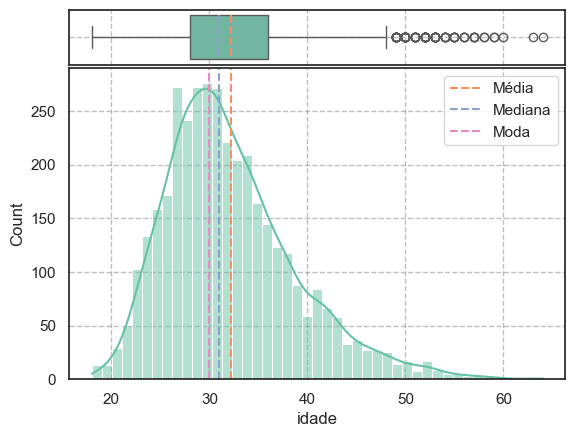

In [24]:
composicao_histograma_boxplot(base, 'idade' , intervalos="auto")

In [25]:
base['idade'].info()

<class 'pandas.core.series.Series'>
Index: 3783 entries, 2 to 5210
Series name: idade
Non-Null Count  Dtype
--------------  -----
3783 non-null   int64
dtypes: int64(1)
memory usage: 59.1 KB


<Axes: xlabel='Count', ylabel='genero'>

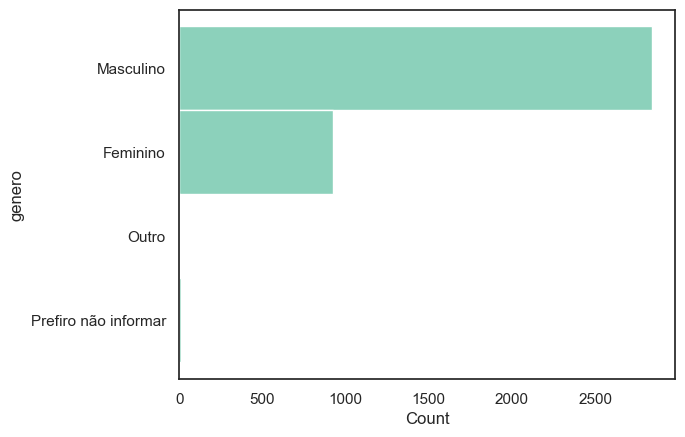

In [26]:
sns.histplot(data=base, y='genero')

In [24]:
aspectos_prejudicados = [
    '1.f.1_Quantidade de oportunidades de emprego/vagas recebidas',
 '1.f.2_Senioridade das vagas recebidas em relação à sua experiência',
 '1.f.3_Aprovação em processos seletivos/entrevistas',
 '1.f.4_Oportunidades de progressão de carreira',
 '1.f.5_Velocidade de progressão de carreira',
 '1.f.6_Nível de cobrança no trabalho/Stress no trabalho',
 '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
 '1.f.8_Relação com outras pessoas da empresa, em momentos de trabalho',
 '1.f.9_Relação com outras pessoas da empresa, em momentos de integração e outros momentos fora do trabalho'
]

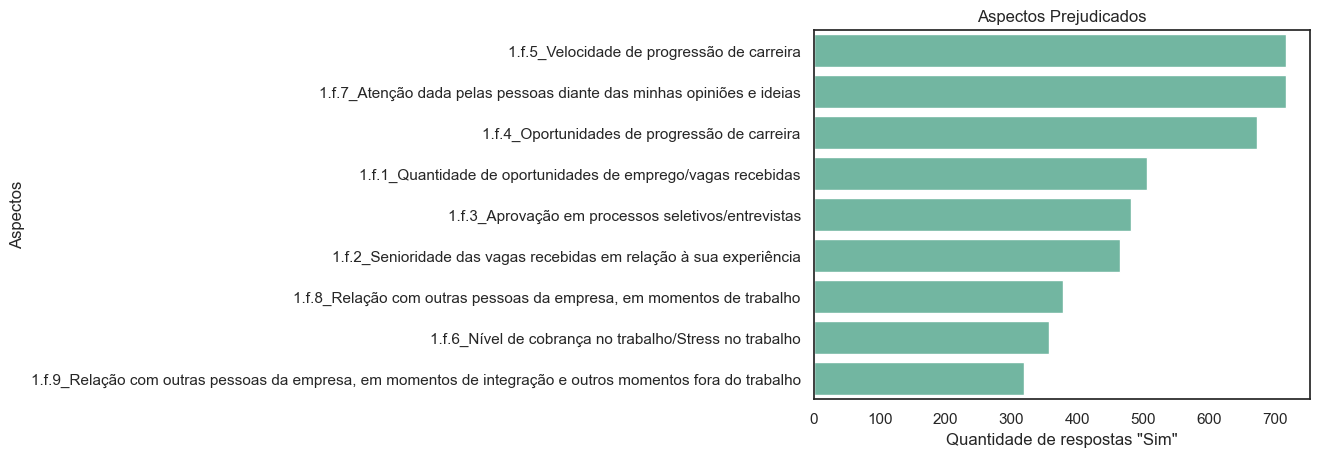

In [25]:
contagem_sim = (base[aspectos_prejudicados] == 'Sim').sum().sort_values(ascending=False)
df_plot = contagem_sim.reset_index()
df_plot.columns = ['Respostas', 'Total_Sim']
sns.barplot(data=df_plot, y='Respostas', x='Total_Sim',)
plt.title('Aspectos Prejudicados')
plt.xlabel('Quantidade de respostas "Sim"')
plt.ylabel('Aspectos')
plt.show();

<Axes: xlabel='vive_no_brasil', ylabel='count'>

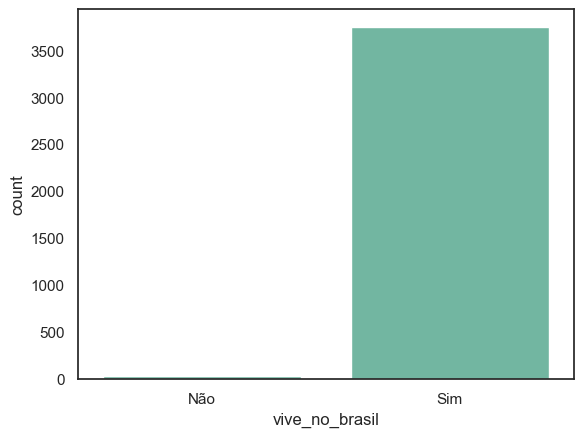

In [27]:
sns.countplot(data=base, x='vive_no_brasil') 

<Axes: xlabel='count', ylabel='uf_onde_mora'>

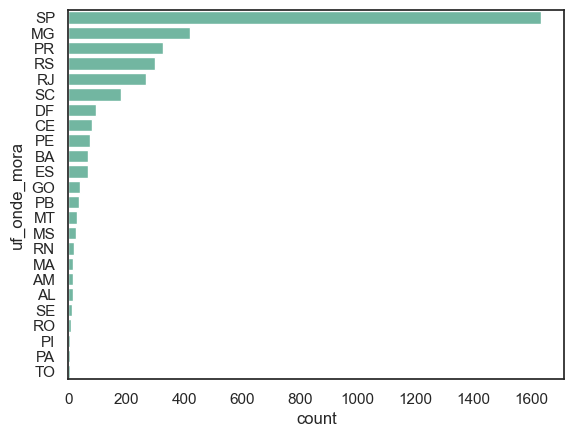

In [29]:
ordem_uf = base['uf_onde_mora'].value_counts().index
sns.countplot(data=base, y='uf_onde_mora', order=ordem_uf) 

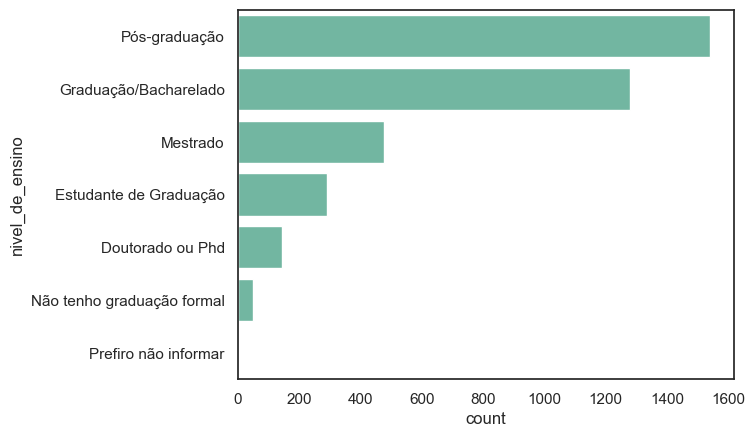

In [30]:
ordem_nivel = base['nivel_de_ensino'].value_counts().index
sns.countplot(data=base, y='nivel_de_ensino', order=ordem_nivel);

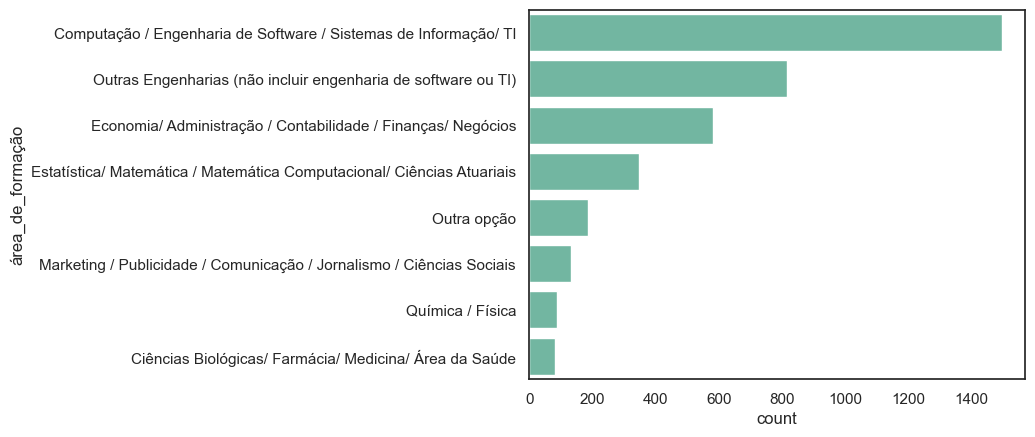

In [32]:
ordem_formacao = base['área_de_formação'].value_counts().index
sns.countplot(data=base, y='1.m_área_de_formação', order=ordem_formacao);

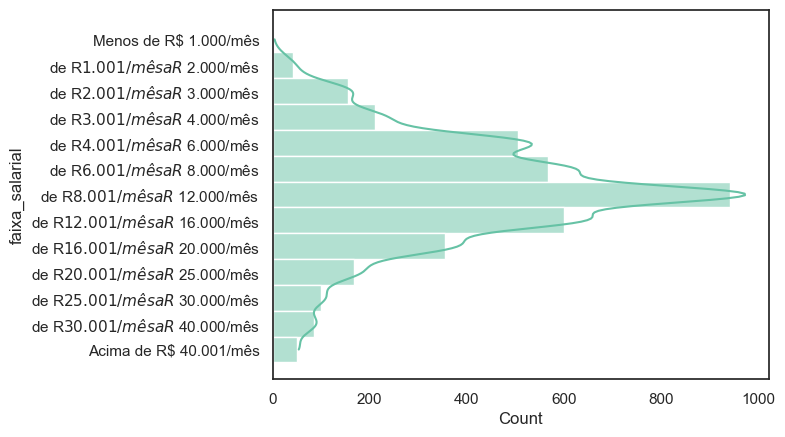

In [39]:
#ordem_salario = base['2.h_faixa_salarial'].value_counts().index
sns.histplot(data=base, y='faixa_salarial', kde=True );